<a href="https://colab.research.google.com/github/Schwarzam/Gus/blob/master/Star%20Galaxy%20Separation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import pandas.testing as tm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import itertools
from mlxtend.plotting import plot_decision_regions
import matplotlib as mpl 
import matplotlib.gridspec as gridspec
from sklearn import metrics

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Reading dataset from github and saving as dataframe
url = 'https://raw.githubusercontent.com/marixko/'
file = 'tutorial_classifiers/master/tutorial_data.txt'
df = pd.read_csv(url+file, delim_whitespace=True, low_memory=False)

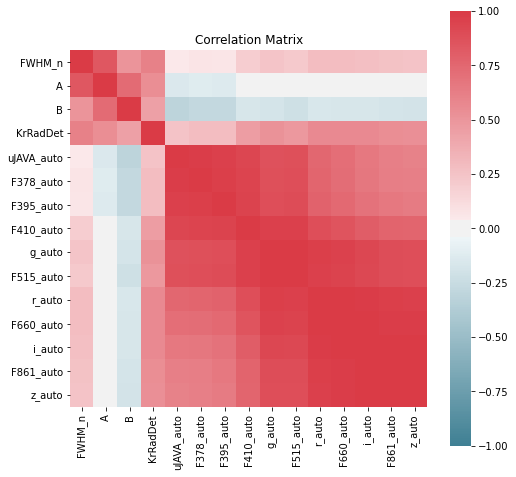

In [3]:
plt.close()
f, ax = plt.subplots(figsize=(8, 8))
var = ['FWHM_n', 'A', 'B', 'KrRadDet', 'uJAVA_auto', 
       'F378_auto', 'F395_auto', 'F410_auto', 'g_auto', 'F515_auto',
       'r_auto', 'F660_auto', 'i_auto', 'F861_auto', 'z_auto']
corr = df[var].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, center=0, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

#It would also be interesting to check the correlation plot for each class

In [4]:
# For qualitative variables, use value_counts()
df['class'].value_counts()

STAR      5000
GALAXY    5000
Name: class, dtype: int64

In [0]:
dim15 = ['FWHM_n', 'A', 'B', 'KrRadDet', 'uJAVA_auto', 
       'F378_auto', 'F395_auto', 'F410_auto', 'g_auto', 'F515_auto',
       'r_auto', 'F660_auto', 'i_auto', 'F861_auto', 'z_auto']


In [0]:
X_train = df[dim15][1500:8500]
y_train = df['classe'][1500:8500]
X_test = pd.concat([df[dim15][0:1500],df[dim15][8501:10000]])
y_test = pd.concat([df['classe'][0:1500],df['classe'][8501:10000]])

## 6.2. Feature space: dim2

In [0]:
classe = pd.get_dummies(df['class'], drop_first=True)

In [0]:
df ['classe'] = classe

In [0]:
df.head()

,FIELD,ID,RA_1,Dec_1,FWHM_n,A,B,KrRadDet,uJAVA_auto,F378_auto,F395_auto,F410_auto,F430_auto,g_auto,F515_auto,r_auto,F660_auto,i_auto,F861_auto,z_auto,class,classe
0,STRIPE82-0125,SPLUS.STRIPE82-0125.12220.griz,327.0204,-1.0042,2.64,3.08,2.40,1.39,19.89,19.78,19.89,19.40,18.96,18.60,18.23,17.80,17.65,17.36,17.23,17.16,GALAXY,0
1,STRIPE82-0130,SPLUS.STRIPE82-0130.19857.griz,329.8803,1.2223,2.19,4.50,4.30,1.31,18.66,18.56,18.28,17.96,17.86,17.40,17.14,16.73,16.69,16.43,16.38,16.20,GALAXY,0
2,STRIPE82-0051,SPLUS.STRIPE82-0051.30304.griz,35.6271,0.0222,2.13,2.79,2.70,1.74,20.56,20.64,20.29,20.71,20.39,20.10,19.68,19.21,19.06,18.81,18.51,18.62,GALAXY,0
3,STRIPE82-0032,SPLUS.STRIPE82-0032.20205.griz,21.8005,1.1796,2.33,4.29,2.48,1.48,20.59,20.81,20.66,19.75,19.66,18.86,18.57,18.03,17.88,17.59,17.30,17.32,GALAXY,0
4,STRIPE82-0003,SPLUS.STRIPE82-0003.17514.griz,0.7698,-0.0778,1.96,2.58,2.52,1.42,20.95,20.39,20.07,20.07,20.27,19.64,19.43,18.99,18.90,18.66,18.79,18.57,GALAXY,0


In [0]:
df.drop(['class'], axis=1, inplace=True)

In [0]:
df.head()

,FIELD,ID,RA_1,Dec_1,FWHM_n,A,B,KrRadDet,uJAVA_auto,F378_auto,...,F410_auto,F430_auto,g_auto,F515_auto,r_auto,F660_auto,i_auto,F861_auto,z_auto,classe
0,STRIPE82-0125,SPLUS.STRIPE82-0125.12220.griz,327.0204,-1.0042,2.64,3.08,2.40,1.39,19.89,19.78,...,19.40,18.96,18.60,18.23,17.80,17.65,17.36,17.23,17.16,0
1,STRIPE82-0130,SPLUS.STRIPE82-0130.19857.griz,329.8803,1.2223,2.19,4.50,4.30,1.31,18.66,18.56,...,17.96,17.86,17.40,17.14,16.73,16.69,16.43,16.38,16.20,0
2,STRIPE82-0051,SPLUS.STRIPE82-0051.30304.griz,35.6271,0.0222,2.13,2.79,2.70,1.74,20.56,20.64,...,20.71,20.39,20.10,19.68,19.21,19.06,18.81,18.51,18.62,0
3,STRIPE82-0032,SPLUS.STRIPE82-0032.20205.griz,21.8005,1.1796,2.33,4.29,2.48,1.48,20.59,20.81,...,19.75,19.66,18.86,18.57,18.03,17.88,17.59,17.30,17.32,0
4,STRIPE82-0003,SPLUS.STRIPE82-0003.17514.griz,0.7698,-0.0778,1.96,2.58,2.52,1.42,20.95,20.39,...,20.07,20.27,19.64,19.43,18.99,18.90,18.66,18.79,18.57,0


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[dim15], df['classe'], test_size=0.3)

In [0]:
from sklearn.linear_model import LogisticRegression 
logis = LogisticRegression(max_iter=10000)

In [24]:
logis.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Make the predictions: 
y_pred2 = logis.predict(X_test)


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1500
           1       1.00      0.99      1.00      1499

    accuracy                           1.00      2999
   macro avg       1.00      1.00      1.00      2999
weighted avg       1.00      1.00      1.00      2999



In [23]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred2 ))

[[1494    6]
 [   8 1491]]


From the confusion matrix above we can already see how good the results are: most of our stars (galaxies) are being assigned as stars (galaxies) and just a few percent were misclassified.

Now let's check the plot and how the separation looks like:

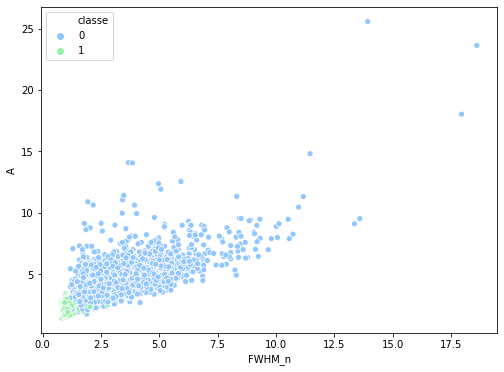

In [0]:
plt.style.use('seaborn-pastel')
fig = plt.figure(figsize=(18,6))
gs = gridspec.GridSpec(1, 2)
ax = plt.subplot(gs[0,0])
sns.scatterplot(x=X_train.FWHM_n, y=X_train.A, 
                    hue=y_train)


In [0]:
#Calculate margin (from https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html)
w = logis.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (logis.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(logis.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

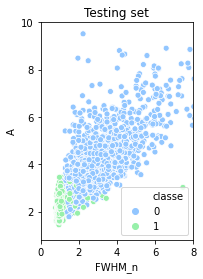

In [0]:
#Plot margin
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.xlabel('FWHM_n')
plt.ylabel('A')
plt.xlim(0,8)
plt.ylim(0.8, 10)

plt.title('Training set')


ax = plt.subplot(gs[0,1])
sns.scatterplot(x=X_test.FWHM_n , y=X_test.A, hue=y_test)
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.xlim(0,8)
plt.ylim(0.8, 10)
plt.title('Testing set')

plt.show()

Text(0.5, 1.0, 'Support vectors (Training set)')

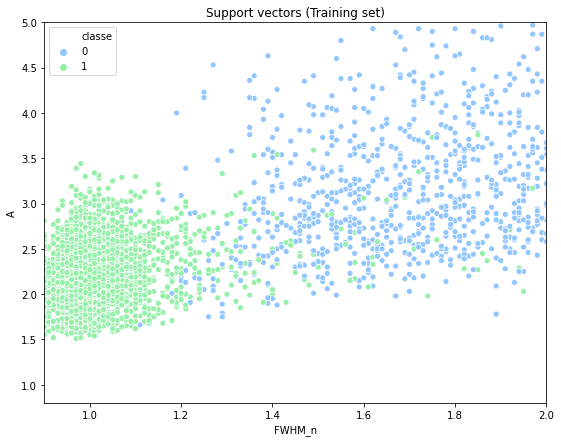

In [0]:
fig = plt.figure(figsize=(9,7))
sns.scatterplot(x=X_train.FWHM_n, y=X_train.A, 
                    hue=y_train)


plt.xlim(0.9,2)
plt.ylim(0.8,5)
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.title('Support vectors (Training set)')